In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
!pip install pmdarima

     -------------------------------------- 572.0/572.0 KB 2.8 MB/s eta 0:00:00
     -------------------------------------- 986.3/986.3 KB 5.7 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 KB 1.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [8]:
wal = pd.read_csv('G:\내 드라이브\Raw데이터(kaggle)\Walmart Sales Dataset of 45stores\walmart-sales-dataset-of-45stores.csv',index_col='Date',parse_dates= True)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify

In [104]:
wal_w = pd.read_csv('G:\내 드라이브\Raw데이터(kaggle)\Walmart Sales Dataset of 45stores\walmart-sales-dataset-of-45stores.csv')

In [115]:
wal_w.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [114]:
wal_w['Date'] = wal_w['Date'].str[6:] + "-"+ wal_w['Date'].str[3:5] +"-"+ wal_w['Date'].str[:2]

In [118]:
wal = wal_w.set_index(['Date'])

In [120]:
wal.index = pd.to_datetime(wal.index)

In [123]:
wal.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [128]:
wal.index.freq = 'B'

ValueError: Inferred frequency None from passed values does not conform to passed frequency B

In [ ]:
wal.index.freq = ''

In [11]:
wal.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
wal = wal.sort_index()

In [129]:
wal_1 = wal[wal['Store'] ==1 ].sort_index()

In [130]:
wal_1_w = wal_1[['Weekly_Sales']]

<AxesSubplot: xlabel='Date'>

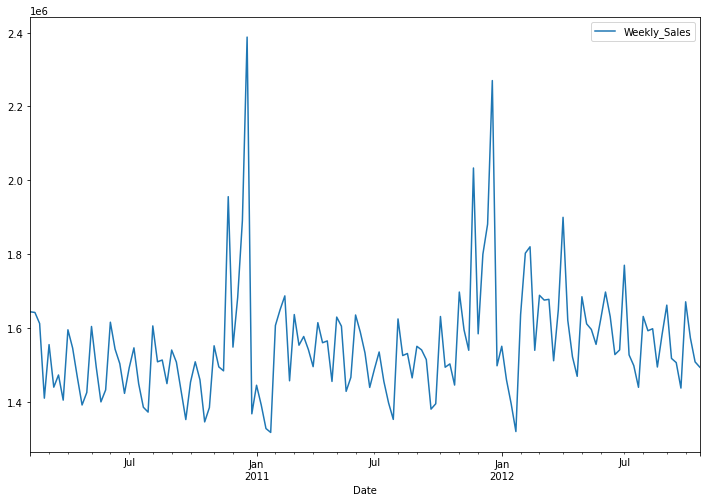

In [131]:
wal_1_w.plot(figsize = (12,8))

In [78]:
wal_1_w.index.freq = 'M'

ValueError: Inferred frequency None from passed values does not conform to passed frequency M

In [132]:
len(wal_1_w)

143

In [133]:
train = wal_1_w.iloc[:113]
test = wal_1_w.iloc[113:]

In [134]:
train.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
import statsmodels.api as sm

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
from pmdarima import auto_arima

In [146]:
auto_arima(wal_1_w['Weekly_Sales'],seasonal=False)

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [102]:
train.sort_index().index.freq = 'D'

ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [136]:
model = sm.tsa.arima.ARIMA(train['Weekly_Sales'], order=(1,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  113
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1513.303
Date:                Sat, 29 Oct 2022   AIC                           3032.606
Time:                        19:31:35   BIC                           3040.788
Sample:                    02-05-2010   HQIC                          3035.926
                         - 03-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.548e+06   2.58e+04     59.970      0.000     1.5e+06     1.6e+06
ar.L1          0.3096      0.054      5.745      0.000       0.204       0.415
sigma2      2.523e+10      0.198   1.27e+11      0.000    2.52e+10    2.52e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               196.22
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.96   Skew:                             1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.6e+25. Standard errors may be unstable.
"""

In [137]:
pred = result.predict(start = len(train),end = len(train) + len(test)-1,dynamic=False, typ = 'levels').rename('ARIMA(0,0,1) prediction')

In [147]:
model = sm.tsa.arima.ARIMA(wal_1_w['Weekly_Sales'], order=(2,1,3))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1897.843
Date:                Sat, 29 Oct 2022   AIC                           3807.686
Time:                        19:35:15   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+37. Standard errors may be unstable.
"""

In [152]:
pred = result.predict(start = len(wal_1_w),end = len(wal_1_w) + 20,dynamic=False, typ = 'levels').rename('ARIMA(2,1,3) prediction')

In [149]:
pred.head()

2012-11-02    1.574583e+06
2012-11-09    1.571373e+06
2012-11-16    1.544934e+06
2012-11-23    1.565757e+06
2012-11-30    1.558339e+06
Freq: W-FRI, Name: ARIMA(0,0,1) prediction, dtype: float64

<AxesSubplot: xlabel='Date'>

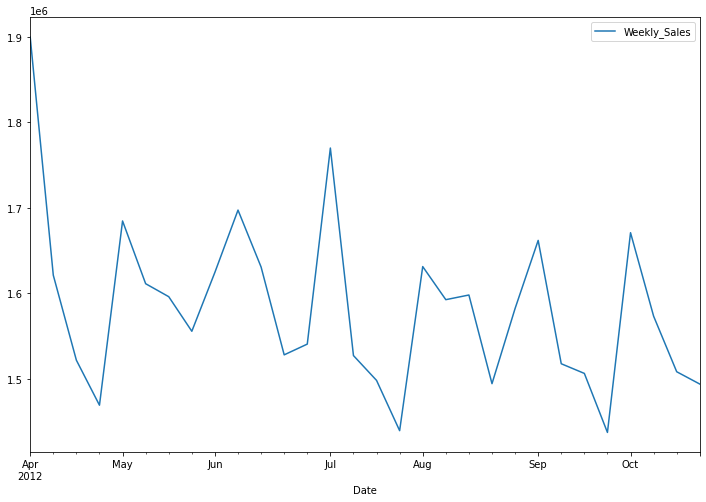

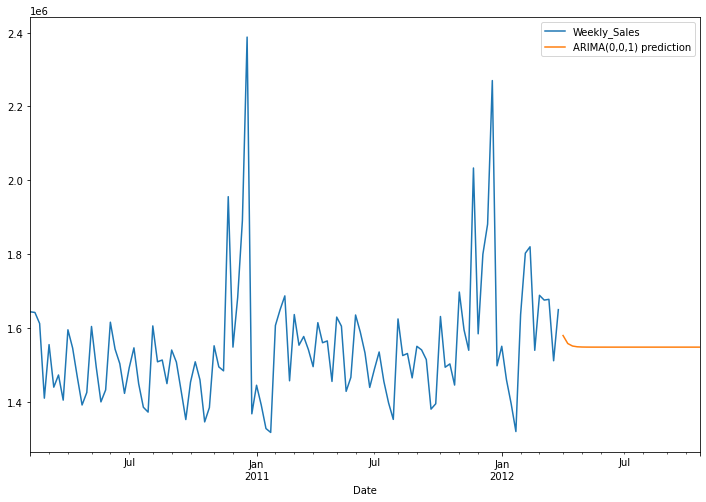

In [145]:
test.plot(figsize=(12,8),legend=True)
train.plot(figsize=(12,8),legend=True)
pred.plot(legend = True)

<AxesSubplot: xlabel='Date'>

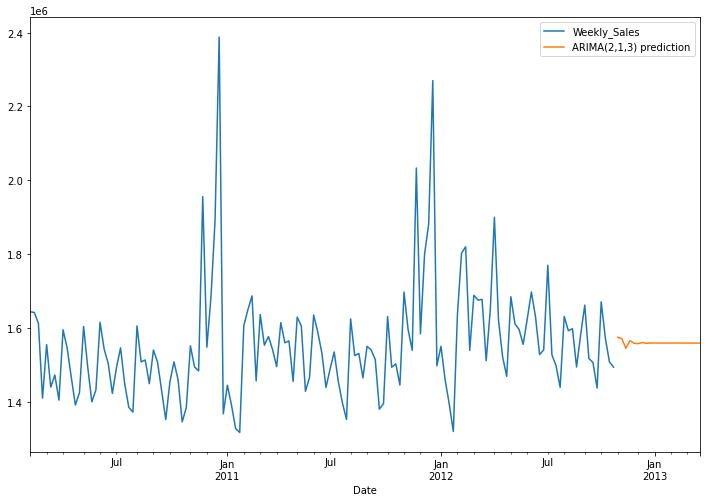

In [153]:
wal_1_w.plot(figsize=(12,8),legend=True)
#train.plot(figsize=(12,8),legend=True)
pred.plot(legend = True)

<AxesSubplot: >

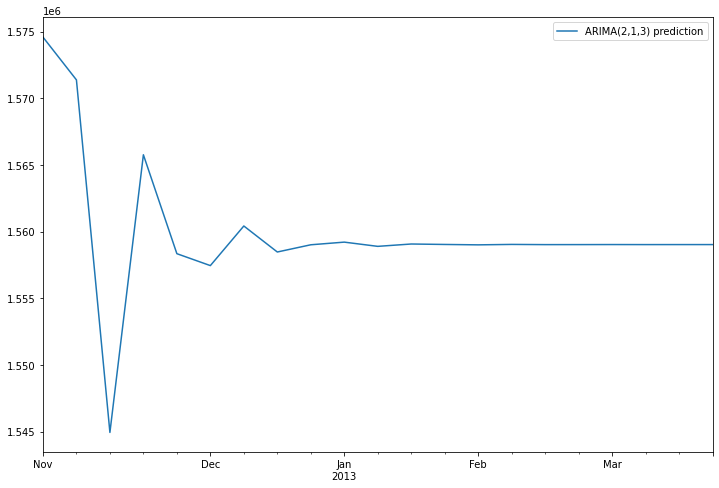

In [154]:
pred.plot(figsize= (12,8),legend = True)

In [140]:
test.mean()

Weekly_Sales    1.582610e+06
dtype: float64

In [141]:
pred.mean()

1549523.5523232133

In [142]:
test.mean() - pred.mean()

Weekly_Sales    33086.287343
dtype: float64

Weekly_Sales    0.021353
dtype: float64